<a href="https://colab.research.google.com/github/skl30misha/data-science-portfolio/blob/main/SmartCVScanner/SmartCVScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install transformers

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/SmartCVScanner')

Mounted at /content/drive


#  PDF Upload and Text Extraction

In [5]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.0 MB/s eta 0:00:00


In [6]:
from google.colab import files
import fitz  # PyMuPDF

def extract_text_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

# 1. Upload file using the button
uploaded = files.upload()


Saving Mykhailo_Sakivsky_Data_Science_CV.pdf to Mykhailo_Sakivsky_Data_Science_CV.pdf


#Extract and clean the text of the downloaded file

In [7]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase (can be skipped if using a cased model)
    text = text.lower()

    # Remove unwanted characters, keeping emails, links, etc.
    text = re.sub(r"[^\w\s@.:/]", "", text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


# Apply to uploaded file(s)
for filename in uploaded.keys():
    print(f"✅ File uploaded: {filename}")

    # Step 1: extract text
    raw_text = extract_text_from_pdf(filename)

    # Step 2: clean text
    cleaned_text = clean_text(raw_text)

    # Step 3: preview the result
    print("\n📄 First 1000 characters of cleaned text:\n")
    print(cleaned_text[:1000])



✅ Файл загружен: Mykhailo_Sakivsky_Data_Science_CV.pdf

📄 Первые 1000 символов очищенного текста:

education projects fife college edinburgh diploma in data science scqf level 7 2025present sakivskyi mykhailo experience profile data scientist data analyst python power bi machine learning sandi data analyst assistant prepared and transformed raw datasets using python pandas numpy to support predictive modeling. conducted data cleaning missing value handling and data formatting for machine learning workflows. created interactive dashboards in power bi and visual reports with matplotlib/seaborn to support decisionmaking. performed customer segmentation campaign performance evaluation and trend analysis for marketing insights. collaborated with senior data scientists on eda feature engineering and model evaluation tasks. bydgoszcz poland solair installation junior data analyst marketing manager collected organized and structured customer and sales data to support digital marketing strategi

# EDA

📏 Длина очищенного текста: 5023 символов
🔢 Количество слов: 699

📊 Топ-20 наиболее частых слов:
and: 42
data: 25
in: 17
to: 16
i: 14
with: 11
marketing: 8
power: 7
for: 7
customer: 7
my: 7
learning: 6
analyst: 5
bi: 5
business: 5
a: 5
edinburgh: 4
science: 4
sakivskyi: 4
mykhailo: 4


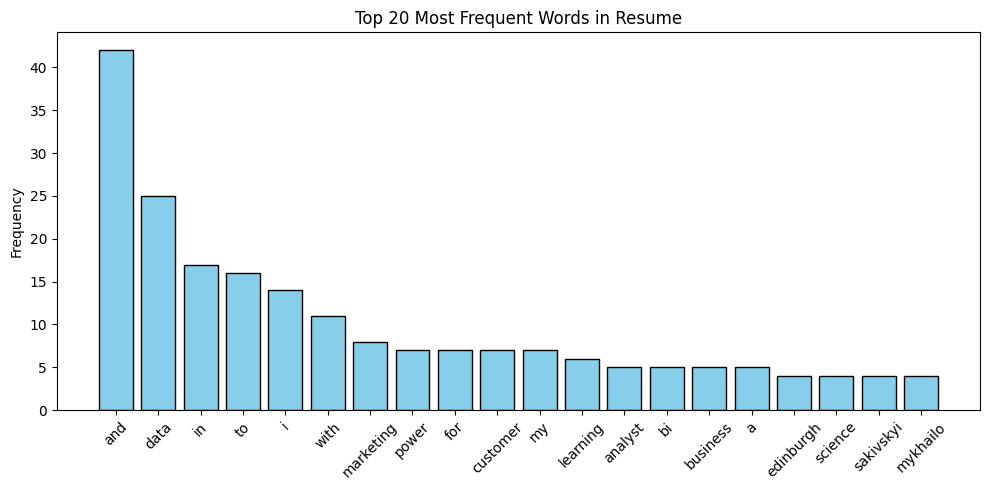


🧠 Уникальность словаря (vocab richness): 0.541


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


🧬 Количество BERT-токенов: 931

🔍 Первые 30 токенов:
['education', 'projects', 'fife', 'college', 'edinburgh', 'diploma', 'in', 'data', 'science', 'sc', '##q', '##f', 'level', '7', '202', '##5', '##pres', '##ent', 'sa', '##ki', '##vsky', '##i', 'my', '##kha', '##ilo', 'experience', 'profile', 'data', 'scientist', 'data']

⚠️ ВНИМАНИЕ: Превышено 512 токенов — нужно разбивать текст на чанки.


In [8]:
# 📦 Import libraries
import matplotlib.pyplot as plt
from collections import Counter
from transformers import BertTokenizer

# 🧼 Using cleaned text
text = cleaned_text

# 1️⃣ Number of characters and words
print(f"📏 Length of cleaned text: {len(text)} characters")
print(f"🔢 Number of words: {len(text.split())}")

# 2️⃣ Word frequency analysis
word_counts = Counter(text.split())
most_common = word_counts.most_common(20)
print("\n📊 Top 20 most frequent words:")
for word, count in most_common:
    print(f"{word}: {count}")

# 3️⃣ Visualization (Top 20 words)
words, counts = zip(*most_common)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title("Top 20 Most Frequent Words in Resume")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4️⃣ Vocabulary richness
vocab_richness = len(set(text.split())) / len(text.split())
print(f"\n🧠 Vocabulary richness: {vocab_richness:.3f}")

# 5️⃣ Tokens for BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize(text)
print(f"\n🧬 Number of BERT tokens: {len(tokens)}")

# 6️⃣ Show first 30 tokens
print("\n🔍 First 30 tokens:")
print(tokens[:30])

# 7️⃣ Check for token limit exceedance
if len(tokens) > 512:
    print("\n⚠️ WARNING: Token count exceeds 512 — text needs to be chunked.")
else:
    print("\n✅ Text fits into a single BERT run (up to 512 tokens)")






# Zero-Shot Classification от Hugging Face

In [9]:
from transformers import pipeline
import re

# Model initialization
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
labels = ["Data Scientist", "Not suitable"]

# Skills list for Data Scientist
data_science_skills = [
    "python", "sql", "pandas", "numpy", "matplotlib", "seaborn", "scikit-learn",
    "machine learning", "deep learning", "tensorflow", "keras", "xgboost",
    "data visualization", "eda", "statistics", "regression", "classification", "power bi"
]

# Function to evaluate skills in the text
def evaluate_skills(text, skill_list):
    text_lower = text.lower()
    found_skills = []
    for skill in skill_list:
        pattern = r'\b' + re.escape(skill.lower()) + r'\b'
        if re.search(pattern, text_lower):
            found_skills.append(skill)
    score = len(found_skills) / len(skill_list)
    return score, found_skills

# Run zero-shot classification
result = classifier(cleaned_text, candidate_labels=labels)
predicted = result["labels"][0]
print(f"\n🏷️ Predicted profession: {predicted}")

# Threshold for skill match acceptance
threshold = 0.7

if predicted == "Data Scientist":
    score, matched = evaluate_skills(cleaned_text, data_science_skills)
    percent = score * 100
    print(f"🧠 Skill match: {len(matched)}/{len(data_science_skills)} = {percent:.1f}%")
    print("✅ Found skills:", ", ".join(matched))

    if score >= threshold:
        print("📨 Resume is suitable — send to HR ✅")
    else:
        print("❌ Not enough skills — reject")
else:
    print("❌ This is not a Data Scientist resume — reject")



config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu



🏷️ Predicted profession: Data Scientist
🧠 Skill match: 15/18 = 83.3%
✅ Found skills: python, sql, pandas, numpy, matplotlib, seaborn, machine learning, deep learning, keras, xgboost, eda, statistics, regression, classification, power bi
📨 Resume is suitable — send to HR ✅
